In [25]:
import sys
sys.path.append('/Users/paolamartire/shocks')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Utilities.basic_units import radians
from src import orbits as orb
from Utilities import sections as sec
import matplotlib.colors as colors
import Utilities.prelude as prel

from Utilities.operators import make_tree, Ryan_sampler, to_cylindric
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 300

In [26]:
abspath = '/Users/paolamartire/shocks/'
G = 1
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5
params = [Mbh, Rstar, mstar, beta]
check = '' # '' or 'HiRes' or 'LowRes'
snap = '216'
compton = 'Compton'

folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}{compton}{check}'
path = f'{abspath}TDE/{folder}/{snap}'
saving_path = f'Figs/{folder}/{check}'
print(f'We are in: {path}, \nWe save in: {saving_path}')

Rt = Rstar * (Mbh/mstar)**(1/3)
# Rs = 2*G*Mbh / c**2
R0 = 0.6 * Rt
Rp =  Rt / beta
apo = Rt**2 / Rstar #2 * Rt * (Mbh/mstar)**(1/3)

# cfr tidal disruption and at smoothing lenght
xcfr, ycfr, cfr = orb.make_cfr(Rt)
xcfr0, ycfr0, cfr0 = orb.make_cfr(R0)
# cfr for grid
radii_grid = [R0, Rt, 0.1*apo, 0.3*apo, 0.5*apo, apo] #np.linspace(R0, apo,100)
styles = ['dotted', 'dashed', 'solid', 'solid', 'solid', 'solid']
xcfr_grid, ycfr_grid, cfr_grid = [], [], []
for i,radius_grid in enumerate(radii_grid):
    xcr, ycr, cr = orb.make_cfr(radius_grid)
    xcfr_grid.append(xcr)
    ycfr_grid.append(ycr)
    cfr_grid.append(cr)

We are in: /Users/paolamartire/shocks/TDE/R0.47M0.5BH10000beta1S60n1.5Compton/216, 
We save in: Figs/R0.47M0.5BH10000beta1S60n1.5Compton/


Load data

In [27]:
data = make_tree(path, snap, energy = True)

# div = np.load(f'{folder}/{snap}/DivV_{snap}.npy')
# shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')
# shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')

Rsph = np.sqrt(data.X**2 + data.Y**2 + data.Z**2)
THETA, RADIUS_cyl = to_cylindric(data.X, data.Y)
V = np.sqrt(data.VX**2 + data.VY**2 + data.VZ**2)
dim_cell = data.Vol**(1/3) 
ie_den = data.IE
ie_mass = ie_den/data.Den
L = (4*np.pi*Rsph**2 * prel.csol_cgs * data.Rad) * prel.en_converter

tfb = days_since_distruption(f'{path}/snap_{snap}.h5', m, mstar, Rstar, choose = 'tfb')

# Shock zone
# idx_zone = shockzone[0]
# idx_zone = np.array([int(i) for i in idx_zone])
# x_zone = X[idx_zone]
# y_zone = Y[idx_zone]
# z_zone = Z[idx_zone]
# Vx_zone = VX[idx_zone]
# Vy_zone = VY[idx_zone]
# Vz_zone = VZ[idx_zone]
# Diss_zone = Diss[idx_zone]
# dim_cell_zone = dim_cell[idx_zone]
# div_zone = div[idx_zone]

# Shock surface
# idx_surf = shocksurface[0]
# idx_surf = np.array([int(i) for i in idx_surf])
# x_surf = x_zone[idx_surf]
# y_surf = y_zone[idx_surf]
# z_surf = z_zone[idx_surf]
# Vx_surf = Vx_zone[idx_surf]
# Vy_surf = Vy_zone[idx_surf]
# dim_cell_surf = dim_cell_zone[idx_surf]
# div_surf = div_zone[idx_surf]

Midplane 

In [28]:
# stream = np.load(f'/Users/paolamartire/shocks/data/{folder}/stream_{check}{snap}.npy')
# theta_arr, x_stream, y_stream, z_stream = stream[0], stream[1], stream[2], stream[3]
# stream = [x_stream, y_stream, z_stream]

In [29]:
midplane = np.abs(data.Z) < dim_cell
X_midplane, Y_midplane, Z_midplane, dim_midplane, Mass_midplane, Den_midplane, Temp_midplane, Rad_den_midplane, L_midplane, IEmass_midplane = \
    sec.make_slices([data.X, data.Y, data.Z, dim_cell, data.Mass, data.Den, data.Temp, data.Rad, L, ie_mass], midplane)

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.864')

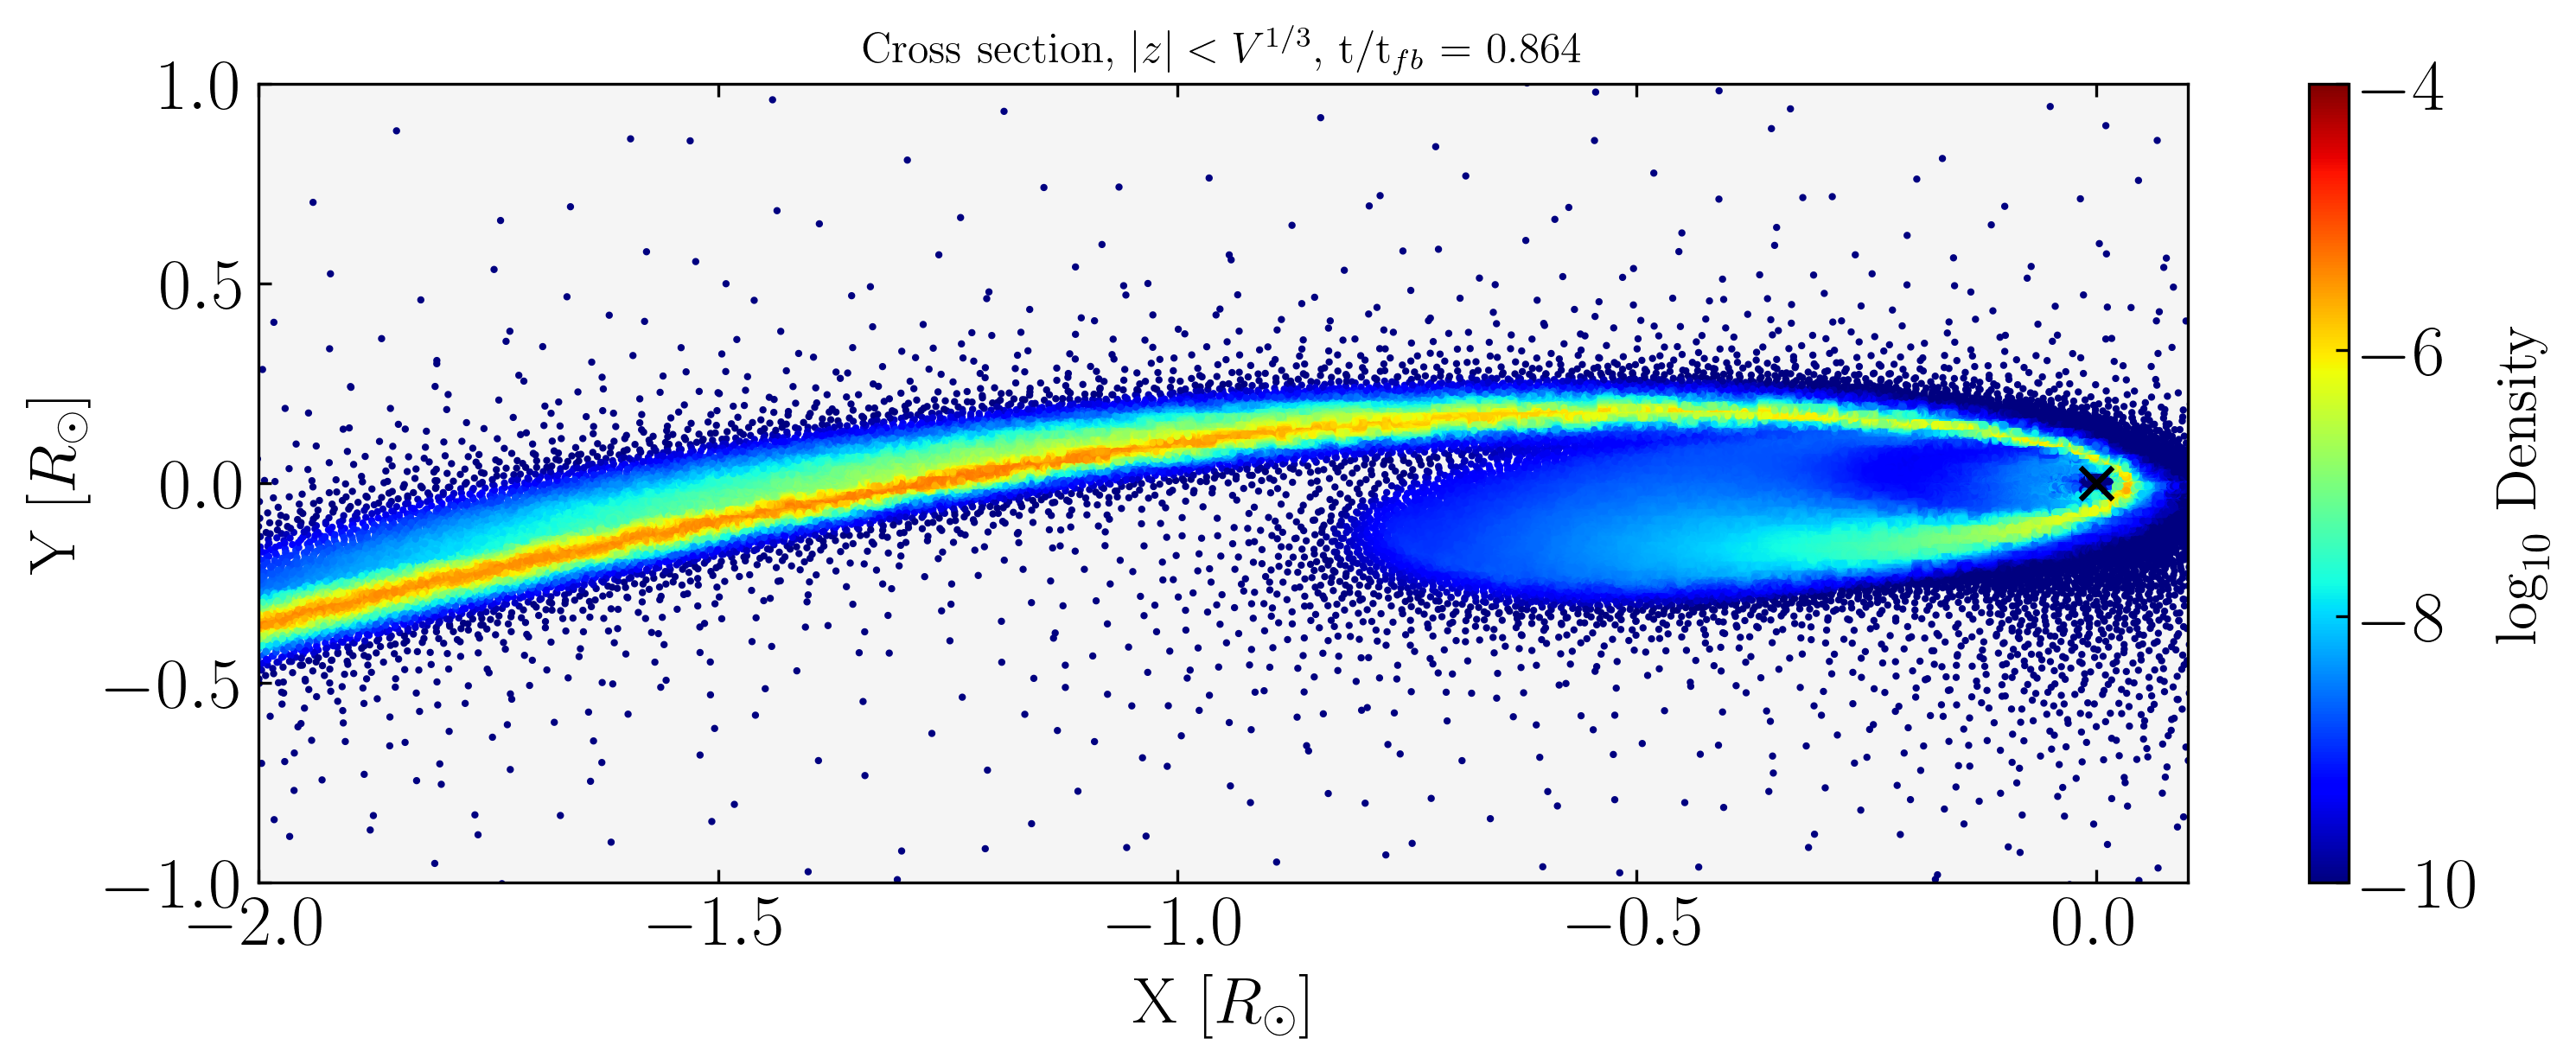

In [35]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = np.log10(Den_midplane), s = 1, cmap = 'jet',vmin = -10, vmax = -4)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.scatter(0,0,c= 'k', marker = 'x', s=80)
ax.set_xlim(-2,0.1)
ax.set_ylim(-1,1)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.864')

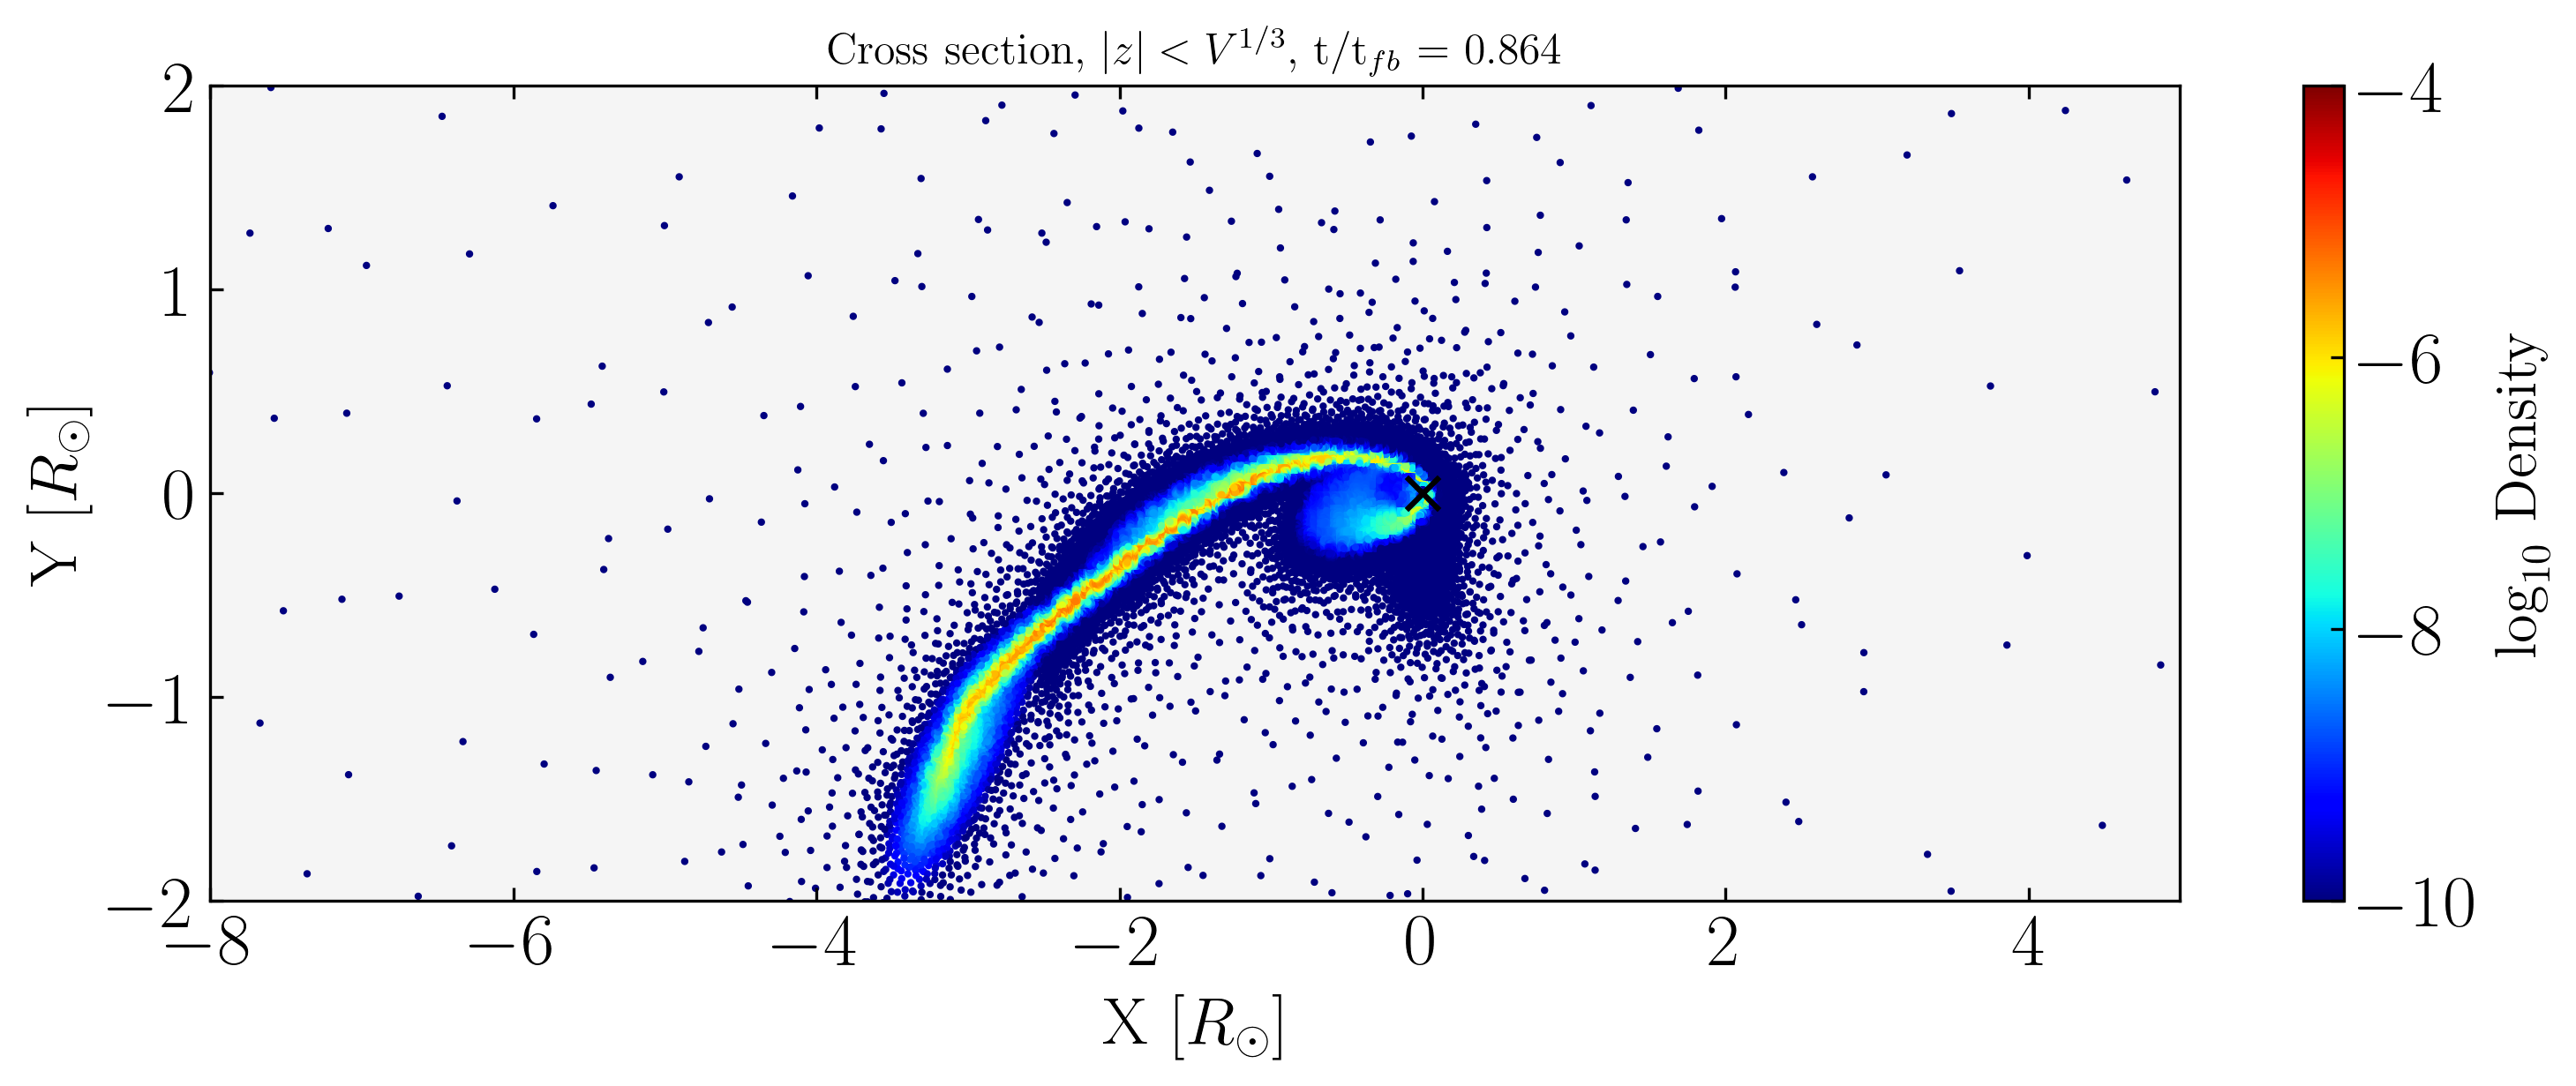

In [31]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = np.log10(Den_midplane), s = 1, cmap = 'jet',vmin = -10, vmax = -4)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.scatter(0,0,c= 'k', marker = 'x', s=80)
ax.set_xlim(-8,5)
ax.set_ylim(-2,2)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
# plt.savefig(f'{saving_path}/slices/midplaneTemp_{snap}.png')

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.864')

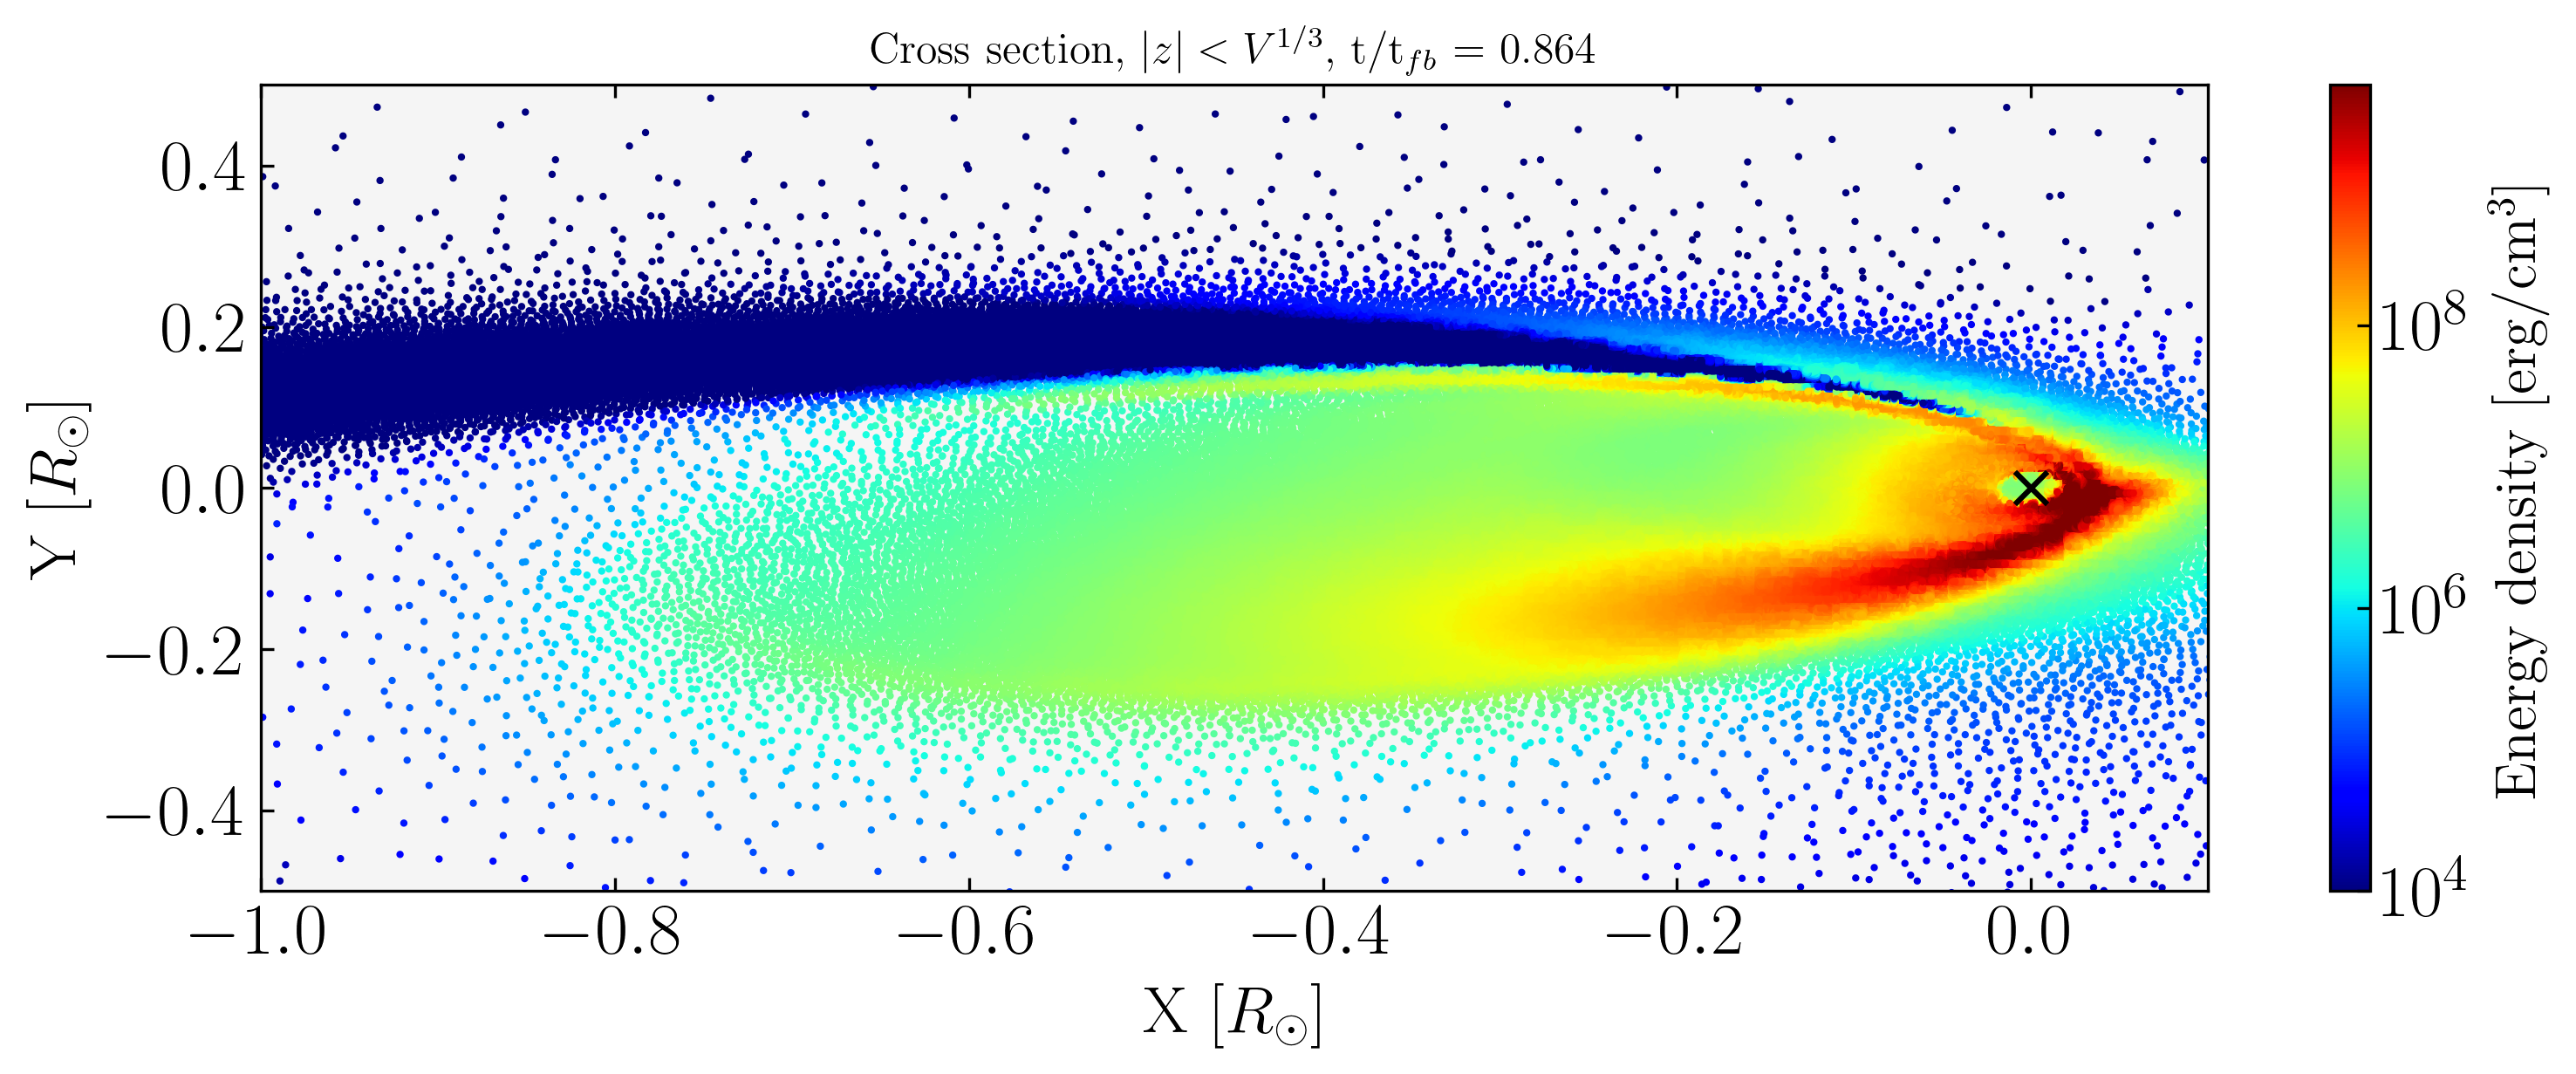

In [32]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = Rad_den_midplane * prel.en_den_converter, s = 1, cmap = 'jet', norm = colors.LogNorm(vmin= 1e4, vmax = 5e9))
cbar = plt.colorbar(img)
cbar.set_label(r'Energy density [erg/cm$^3$]', fontsize = 16)
ax.scatter(0,0,c= 'k', marker = 'x', s=80)
ax.set_xlim(-1,0.1)
ax.set_ylim(-0.5,0.5)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.864')

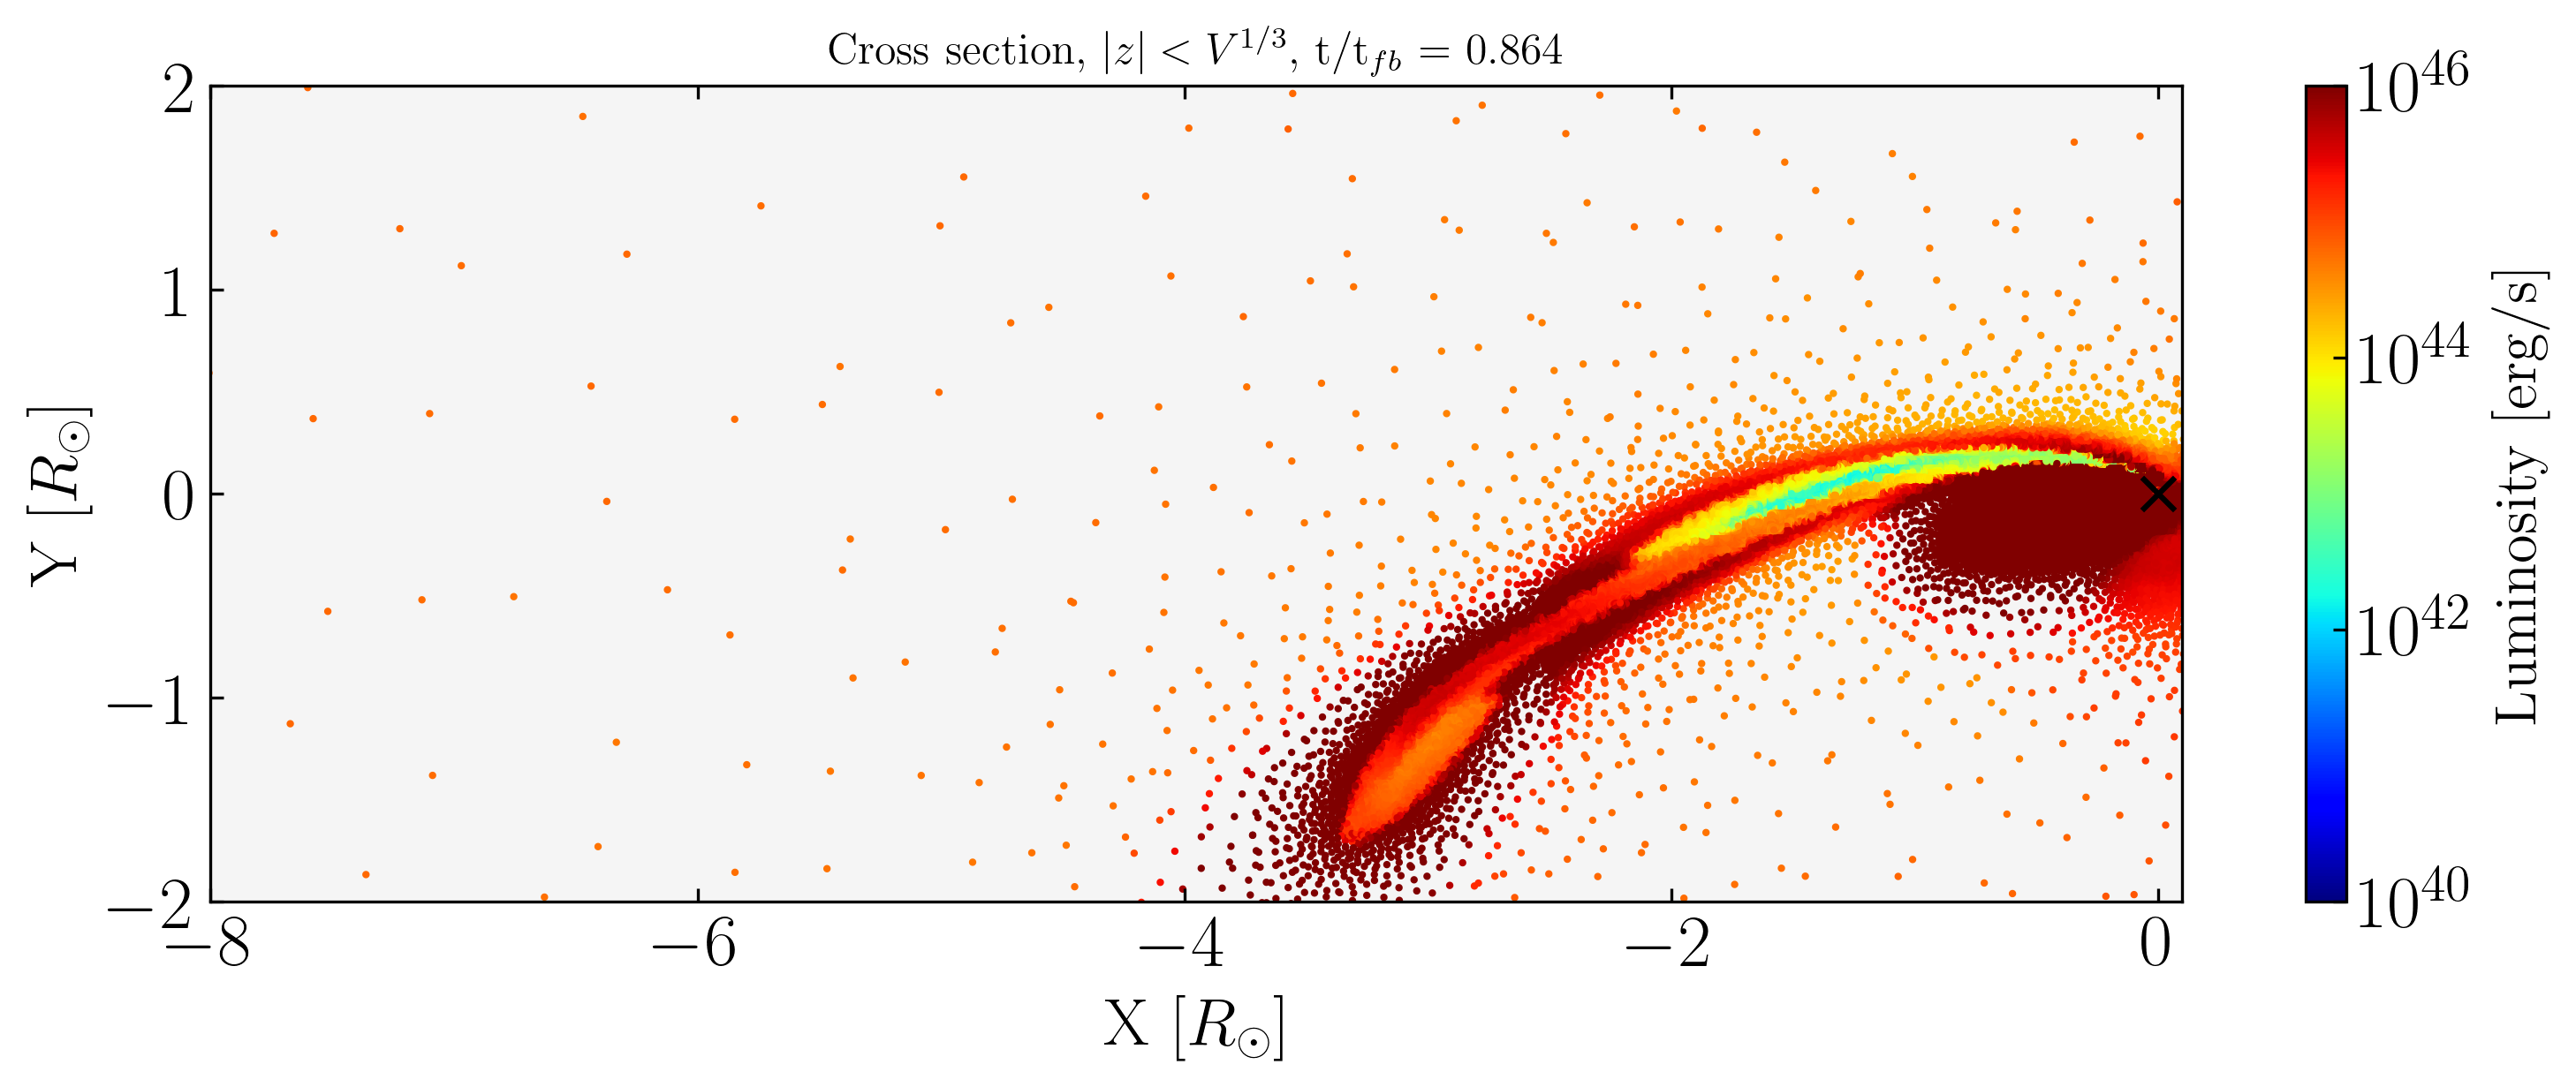

In [33]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = L_midplane, s = 1, cmap = 'jet', norm = colors.LogNorm(vmin= 1e40, vmax = 1e46))
cbar = plt.colorbar(img)
cbar.set_label(r'Luminosity [erg/s]', fontsize = 16)
ax.scatter(0,0,c= 'k', marker = 'x', s=80)
ax.set_xlim(-8,0.1)
ax.set_ylim(-2,2)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

In [34]:
# search for indeces to explore
selected_indeces = np.arange(30,230,20)
plt.plot(x_stream, y_stream, c = 'k')
plt.scatter(x_stream[selected_indeces], y_stream[selected_indeces], c = 'b')
plt.xlim(-apo,100)
plt.ylim(-100,100)

NameError: name 'x_stream' is not defined

Tangent and transverse plane

In [ ]:
idx = 80
condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, data.Z, dim_cell, x_stream, y_stream, z_stream, idx, coord= True)
X_tra, Y_tra, Z_tra, Vz_tra, Den_tra, Mass_tra, dim_tra = \
    sec.make_slices([data.X, data.Y, data.Z, data.VZ, data.Den, data.Mass, dim_cell], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_tra]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_tra]

Plot as BonnerotLu22

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
ax1.scatter(x_onplane/Rstar, Den_tra, s=.1, c='k')
ax1.set_xlabel(r'T/R$_\star$')
ax1.set_ylabel(r'Density [M$_\odot$/R$_\odot^3$]')
ax1.set_xlim(-15,15)
ax1.grid()

ax2.scatter(Z_tra/Rstar, Vz_tra, s=.1, c='k')
ax2.set_xlabel(r'Z/R$_\star$')
ax2.set_ylabel(r'V$_z [R_\odot/\tilde{t}$]')
ax2.set_xlim(-6.5,6.5)
ax2.set_ylim(-0.5, 0.5)
ax2.grid()

plt.tight_layout()
plt.suptitle('Reproducing Fig.3 from BonnerotLu22')

In [ ]:
indeces_boundary, x_T_width, w_params, h_params, thresh = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, data.Mass, stream , idx, params)

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (14,4), gridspec_kw = {'width_ratios': [2, 1]})
img = ax[0].scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'viridis', vmin = 0.1*np.max(Den_tra), vmax = np.max(Den_tra))
cbar = plt.colorbar(img)
cbar.set_label(r' Density', fontsize = 16)
ax[0].scatter(X_tra_midplane, Y_tra_midplane, s = 1, c = 'k')
ax[0].set_xlim(-300,20)
ax[0].set_ylim(-60,60)

img1 = ax[1].scatter(x_onplane, Z_tra, c = Den_tra,  cmap = 'viridis', s = 27, vmin = 0.1*np.max(Den_tra), vmax = np.max(Den_tra))
cbar1 = plt.colorbar(img1)
cbar1.set_label(r'Density', fontsize = 16)
ax[1].scatter(0, z_stream[idx], marker = 'x', s = 37, c = 'k', alpha = 1)
ax[1].axvline(x_T_width[0], c = 'r')
ax[1].axvline(x_T_width[1], c = 'r') # T coordinates for width
ax[1].axvline(-thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
ax[1].axvline(thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
ax[1].text(0.9*thresh, -1.8*thresh, 'cutoff',fontsize = 11, rotation = 90,  bbox=dict(facecolor='white', alpha=0.8))
ax[1].set_xlim(-2*thresh, 2*thresh)

ax[1].axhline(data.Z[indeces_boundary[2]], c = 'r')
ax[1].axhline(data.Z[indeces_boundary[3]], c = 'r')
ax[1].axhline(-thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
ax[1].axhline(thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
ax[1].set_ylim(-2*thresh, 2*thresh)

ax[1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18) 
plt.suptitle(f'{check}, cells W: {int(w_params[1])}, cells H: {int(h_params[1])}, theta: {np.round(theta_arr[idx], 2)}', fontsize = 16)
plt.tight_layout()
